In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
regions = {'北海道・東北':['Hokkaido', 'Aomori', 'Akita', 'Iwate', 'Miyagi', 'Yamagata', 'Fukushima'],
           '関東':['Tokyo', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Kanagawa'],
           '北陸・中部':['Niigata', 'Toyama', 'Ishikawa', 'Fukui','Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi'],
           '近畿':['Kyoto', 'Osaka', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama'],
           '中国':['Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi'],
           '四国':['Tokushima', 'Kagawa', 'Ehime', 'Kochi'],
           '九州・沖縄':['Fukuoka', 'Saga', 'Nagasaki', 'Oita', 'Kumamoto', 'Miyazaki', 'Kagoshima', 'Okinawa']}
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省CSVを読込む
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")
# 新規死亡者
new_death = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv')
new_death["Date"] = pd.to_datetime(new_death["Date"])
new_death = new_death.set_index("Date").diff()

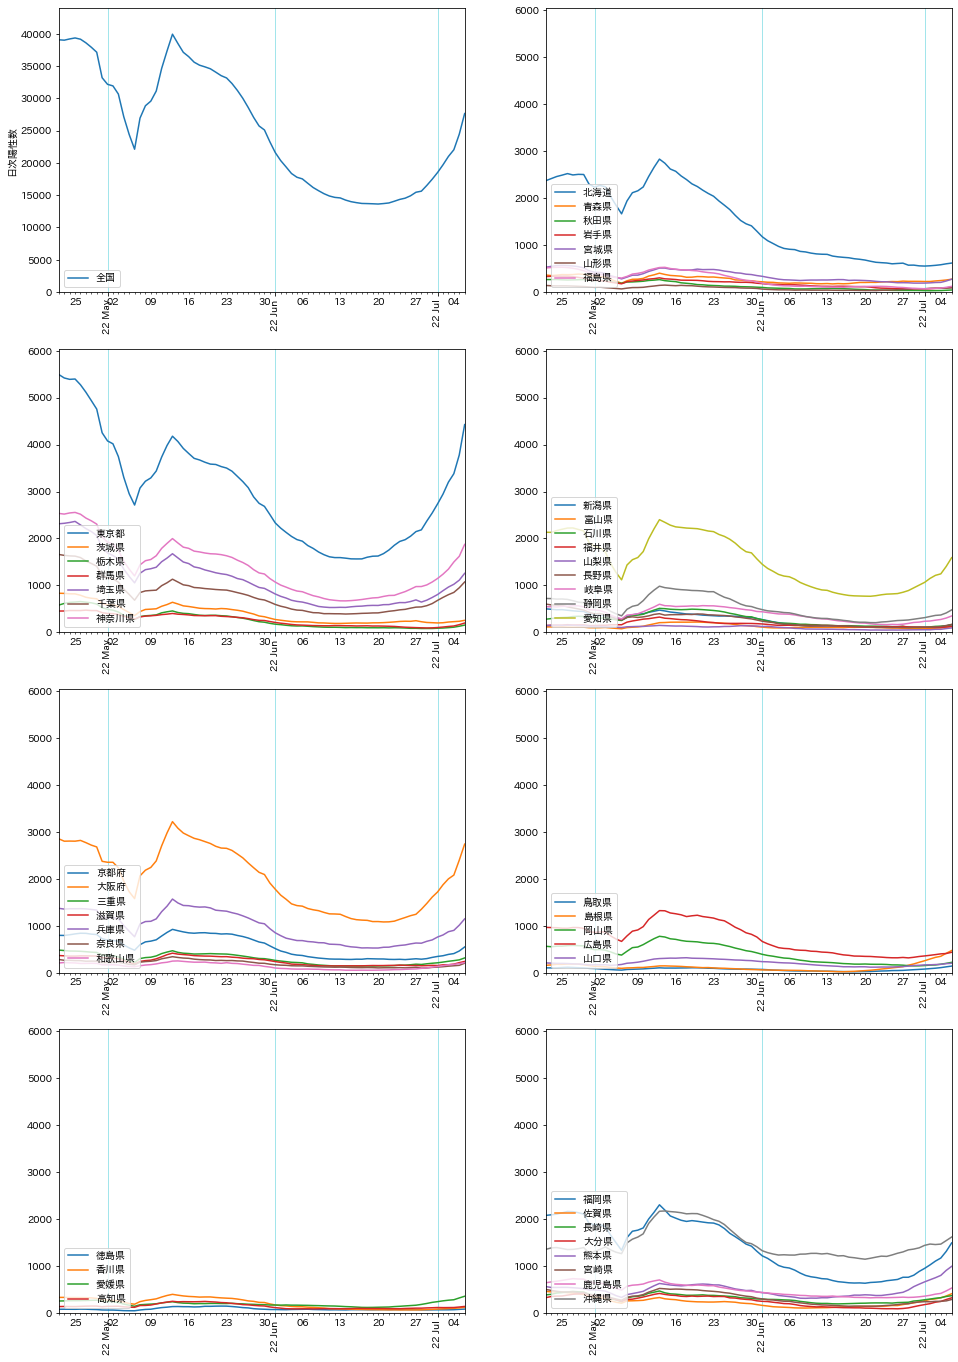

In [41]:
recent_date = dt.datetime.today()-dt.timedelta(weeks = 12) # 17週間前の日付を取得(最初の1週間は移動平均に使うので)
recent_nc = new_case[new_case.index > recent_date].rolling(7).mean().dropna()
# y軸のオーダーを取得
yscale = "linear" # ここを log にすれば対数プロット
if yscale == "log":
    # 対数にする場合
    total_nc_order = np.log10(recent_nc["ALL"].max()).astype(int)+1
    pref_nc_order = np.log10(recent_nc.loc[:,"Hokkaido":].max().max()).astype(int)+1
    total_ylim = (1,10**total_nc_order)
    pref_ylim = (1,10**pref_nc_order)
else:
    # 線形にする場合
    total_nc_order = (recent_nc["ALL"].max()*1.1).astype(int)+1
    pref_nc_order = (recent_nc.loc[:,"Hokkaido":].max().max()*1.1).astype(int)+1
    total_ylim = (0,total_nc_order)
    pref_ylim = (0,pref_nc_order)
    
# 図の準備
fig, axs = plt.subplots(4,2,figsize=(8*2,6*4))
axs = axs.flatten()
for rid in range(len(regions)+1):
    ax = axs[rid]
    if rid == 0:
        recent_nc["ALL"].plot(ax=ax, label=JP_pref_of["ALL"])
        ax.set_ylabel("日次陽性数")
        ax.set_ylim(total_ylim)
    else:
        region_name = list(regions.keys())[rid-1]
        region_df = recent_nc[regions[region_name]]
        region_df.columns = [JP_pref_of[p] for p in regions[region_name]]
        region_df.plot(ax=ax)
        ax.set_ylim(pref_ylim)
    ax.set_yscale(yscale)
    ax.set_xlabel("")
    ax.legend(loc='lower left')
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)
#plt.savefig('fig/CoVid19-Japan-recent-cases_by_area.png', bbox_inches='tight')
plt.show()

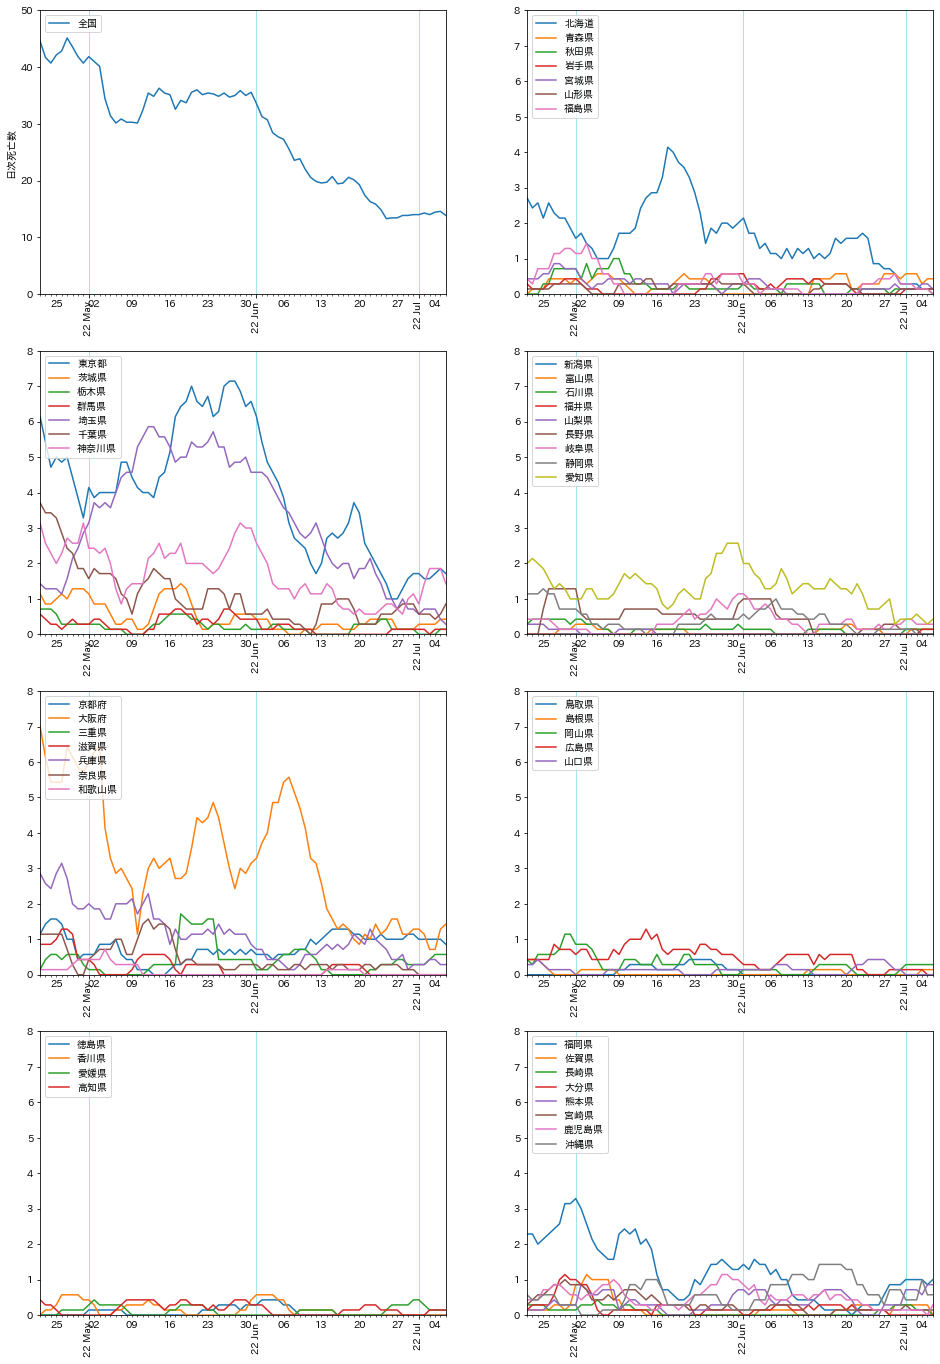

In [42]:
recent_date = dt.datetime.today()-dt.timedelta(weeks = 12) # 17週間前の日付を取得(最初の1週間は移動平均に使うので)
recent_nc = new_case[new_case.index > recent_date].rolling(7).mean().dropna()
recent_nd = new_death[new_death.index > recent_date].rolling(7).mean().dropna()
# y軸のオーダーを取得
yscale = "linear" # ここを log にすれば対数プロット
if yscale == "log":
    # 対数にする場合
    total_nd_order = np.log10(recent_nd["ALL"].max()).astype(int)+1
    pref_nd_order = np.log10(recent_nd.loc[:,"Hokkaido":].max().max()).astype(int)+1
    total_ylim = (1,10**total_nd_order)
    pref_ylim = (1,10**pref_nd_order)
else:
    # 線形にする場合
    total_nd_order = (recent_nd["ALL"].max()*1.1).astype(int)+1
    pref_nd_order = (recent_nd.loc[:,"Hokkaido":].max().max()*1.1).astype(int)+1
    total_ylim = (0,total_nd_order)
    pref_ylim = (0,pref_nd_order)

fig, axs = plt.subplots(4,2,figsize=(8*2,6*4))
axs = axs.flatten()
for rid in range(len(regions)+1):
    ax = axs[rid]
    if rid == 0:
        recent_nd["ALL"].plot(ax=ax, label=JP_pref_of["ALL"])
        ax.set_ylabel("日次死亡数")
        ax.set_ylim(total_ylim)
    else:
        region_name = list(regions.keys())[rid-1]
        region_df = recent_nd[regions[region_name]]
        region_df.columns = [JP_pref_of[p] for p in regions[region_name]]
        region_df.plot(ax=ax)
        ax.set_ylim(pref_ylim)
    ax.set_yscale(yscale)
    ax.set_xlabel("")
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)
plt.savefig('fig/CoVid19-Japan-recent-deaths_by_area.png', bbox_inches='tight')
plt.show()

In [24]:
pref_nc_order = np.log10(recent_nc.loc[:,"Hokkaido":].max().max()).astype(int)+1
pref_nd_order = np.log10(recent_nd.loc[:,"Hokkaido":].max().max()).astype(int)+1
total_nc_order, pref_nc_order, pref_nd_order

(5, 4, 1)

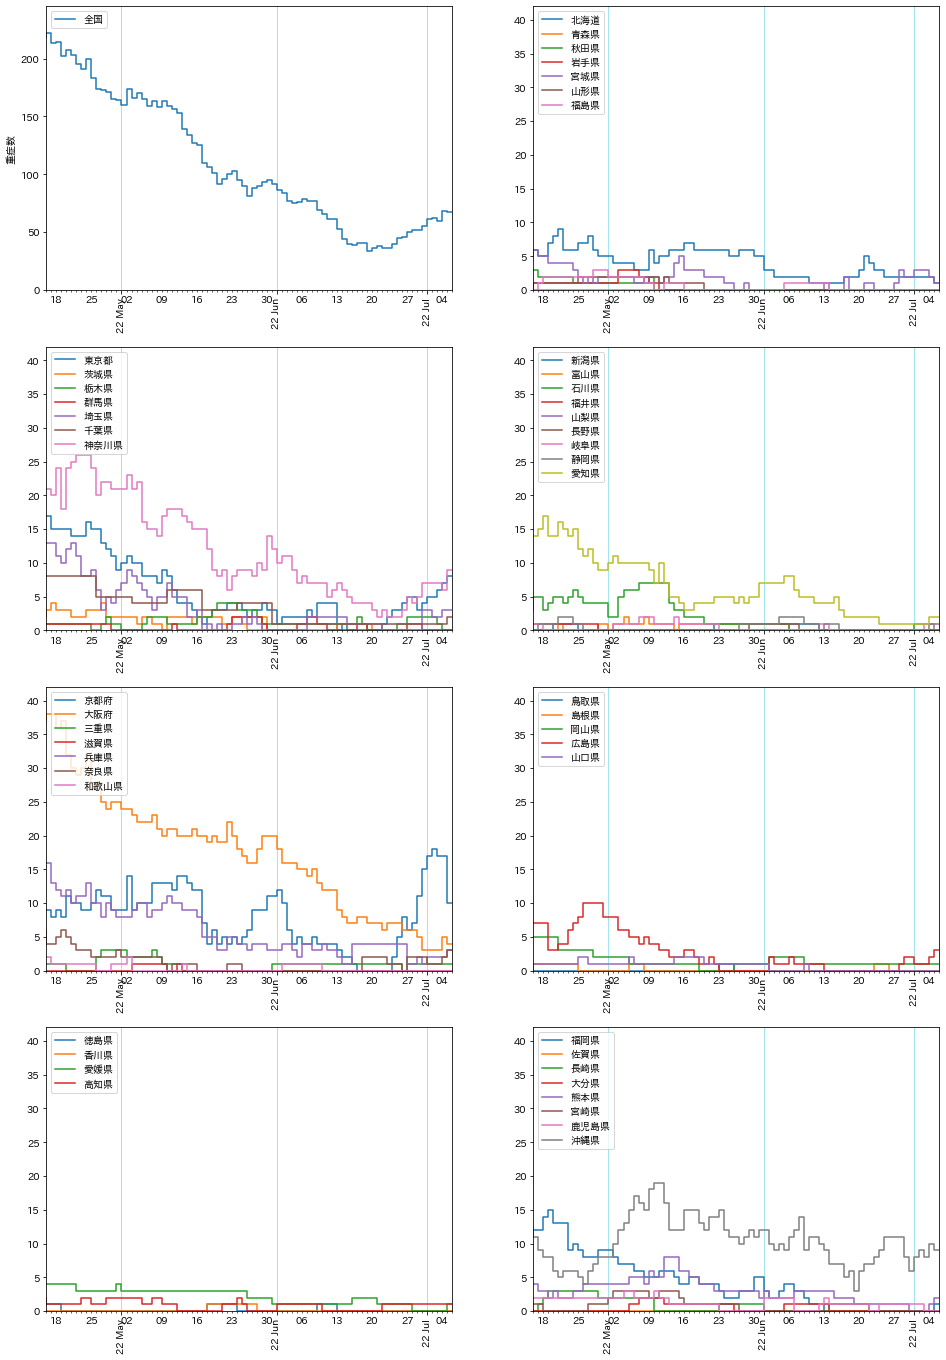

In [51]:
# 重症者
severe_case = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv")
severe_case["Date"] = pd.to_datetime(severe_case["Date"])
severe_case = severe_case.set_index("Date")

#
# 直近 12週間の重症数を地域別にプロット
#
recent_sc = severe_case[severe_case.index > recent_date].rolling(7).mean().dropna()
recent_sc = severe_case[severe_case.index > recent_date]
# y軸のオーダーを取得
yscale = "linear" # ここを log にすれば対数プロット
if yscale == "log":
    # 対数にする場合
    total_order = np.log10(recent_sc["ALL"].max()).astype(int)+1
    pref_order = np.log10(recent_sc.loc[:,"Hokkaido":].max().max()).astype(int)+1
    total_ylim = (1,10**total_order)
    pref_ylim = (1,10**pref_order)
else:
    # 線形にする場合
    total_order = (recent_sc["ALL"].max()*1.1).astype(int)+1
    pref_order = (recent_sc.loc[:,"Hokkaido":].max().max()*1.1).astype(int)+1
    total_ylim = (0,total_order)
    pref_ylim = (0,pref_order)

fig, axs = plt.subplots(4,2,figsize=(8*2,6*4))
axs = axs.flatten()
for rid in range(len(regions)+1):
    ax = axs[rid]
    if rid == 0:
        recent_sc["ALL"].plot(drawstyle="steps", ax=ax, label=JP_pref_of["ALL"])
        ax.set_ylabel("重症数")
        ax.set_ylim(total_ylim)
    else:
        region_name = list(regions.keys())[rid-1]
        region_df = recent_sc[regions[region_name]]
        region_df.columns = [JP_pref_of[p] for p in regions[region_name]]
        region_df.plot(drawstyle="steps", ax=ax)
        ax.set_ylim(pref_ylim)
    ax.set_yscale(yscale)
    ax.set_xlabel("")
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)